# Teste 2 - 11/09/2018

## Disponibilização: 10/09/2018 - 11h
## Encerramento: 11/09/2018 - 20h

O objetivo deste segundo projeto prático da disciplina Redes Neurais Artificias é praticar os conceitos de Machine Learning vistos até o momento, em especial aqueles relativos ao processo de Aprendizagem de Máquina.

Vamos trabalhar com o dataset **Breast Cancer Wisconsin (Diagnostic) Data Set**, vide: <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Repositório UCI</a>

Esta tarefa é dividida em to-dos, isto é, pequenas atividades que devem ser cumpridas para que o objetivo geral seja alcançado. A cada to-do está associada uma célula do Jupyter Notebook, que deve ser preenchida com código Python atendendo ao que se pede.


Edite aqui o nome da equipe:

- Manoel Victor Florencio de Souza
- Sérgio Alexandre Arruda Pinheiro

In [2]:
# Organize seus imports nesta célula
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

### To-Do 1

1. Você deve importar o dataset a partir do sci-kit learn.
Consulte o link: [Link da documentação do sci-kit learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
   * Este dataset está organizado sob a forma de um dicionário, em que os dados preditores encontram-se na chave 'data', composta de diversas matrizes. Cada matriz está associada a um nome 'feature_names'. 
2. Crie um novo dicionário que mapeia cada 'feature_name' para uma matriz correspondente.
    * Antes de fazer esta associação, transponha a matriz localizada na chave 'data' para obter a dimensão correta.
3. Transforme o dataset em um objeto do tipo DataFrame do pandas
4. Adicione o atributo-alvo ao dataset existente.
    * Importante: O atributo-alvo está na chave 'target' do dicionário, com nome 'target_names'

In [3]:
breast_cancer_dataset = load_breast_cancer()

In [4]:
features_names = breast_cancer_dataset.feature_names
data = breast_cancer_dataset.data.transpose()

feature_dict = {}
for feature_name, feature_data in zip(features_names, data):
    feature_dict[feature_name] = feature_data

In [5]:
df = pd.DataFrame.from_dict(feature_dict)

In [6]:
diagnosis_map = {0 : 'malignant', 1 : 'benign'}

df['diagnosis'] = breast_cancer_dataset.target

df.diagnosis = df.diagnosis.map(diagnosis_map)

df.head()

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture,diagnosis
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.3001,0.07871,...,0.6656,0.2654,0.7119,0.11890,184.60,25.38,0.1622,0.4601,17.33,malignant
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.0869,0.05667,...,0.1866,0.1860,0.2416,0.08902,158.80,24.99,0.1238,0.2750,23.41,malignant
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.1974,0.05999,...,0.4245,0.2430,0.4504,0.08758,152.50,23.57,0.1444,0.3613,25.53,malignant
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.2414,0.09744,...,0.8663,0.2575,0.6869,0.17300,98.87,14.91,0.2098,0.6638,26.50,malignant
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.1980,0.05883,...,0.2050,0.1625,0.4000,0.07678,152.20,22.54,0.1374,0.2364,16.67,malignant


### To-Do 2

Utilizando `pandas.DataFrame` para manipular o dataset, faça o que se pede:
1. Informe a quantidade de exemplos existentes no dataset
2. Enumere os atributos existentes no dataset
3. Identifique o atributo-alvo e imprima-o
4. O dataset é balanceado?
5. Remova todos os atributos que contenham a palavra `error`

In [7]:
len(df)

569

In [8]:
list(enumerate(df.columns))

[(0, 'area error'),
 (1, 'compactness error'),
 (2, 'concave points error'),
 (3, 'concavity error'),
 (4, 'fractal dimension error'),
 (5, 'mean area'),
 (6, 'mean compactness'),
 (7, 'mean concave points'),
 (8, 'mean concavity'),
 (9, 'mean fractal dimension'),
 (10, 'mean perimeter'),
 (11, 'mean radius'),
 (12, 'mean smoothness'),
 (13, 'mean symmetry'),
 (14, 'mean texture'),
 (15, 'perimeter error'),
 (16, 'radius error'),
 (17, 'smoothness error'),
 (18, 'symmetry error'),
 (19, 'texture error'),
 (20, 'worst area'),
 (21, 'worst compactness'),
 (22, 'worst concave points'),
 (23, 'worst concavity'),
 (24, 'worst fractal dimension'),
 (25, 'worst perimeter'),
 (26, 'worst radius'),
 (27, 'worst smoothness'),
 (28, 'worst symmetry'),
 (29, 'worst texture'),
 (30, 'diagnosis')]

In [9]:
df.columns

Index(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean perimeter', 'mean radius',
       'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error',
       'radius error', 'smoothness error', 'symmetry error', 'texture error',
       'worst area', 'worst compactness', 'worst concave points',
       'worst concavity', 'worst fractal dimension', 'worst perimeter',
       'worst radius', 'worst smoothness', 'worst symmetry', 'worst texture',
       'diagnosis'],
      dtype='object')

In [10]:
df.diagnosis

0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
5      malignant
6      malignant
7      malignant
8      malignant
9      malignant
10     malignant
11     malignant
12     malignant
13     malignant
14     malignant
15     malignant
16     malignant
17     malignant
18     malignant
19        benign
20        benign
21        benign
22     malignant
23     malignant
24     malignant
25     malignant
26     malignant
27     malignant
28     malignant
29     malignant
         ...    
539       benign
540       benign
541       benign
542       benign
543       benign
544       benign
545       benign
546       benign
547       benign
548       benign
549       benign
550       benign
551       benign
552       benign
553       benign
554       benign
555       benign
556       benign
557       benign
558       benign
559       benign
560       benign
561       benign
562    malignant
563    malignant
564    malignant
565    malignant
566    maligna

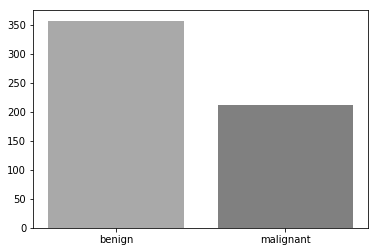

In [11]:
#4. 
plt.bar('benign', len(df[df.diagnosis == 'benign']), color='darkgray')
plt.bar('malignant', len(df[df.diagnosis == 'malignant']), color='gray')
plt.show()

Não, o dataset possui uma quantidade de diagnósticos benignos aproximadamente 1.75 vezes superior a quantidade de diagnósticos malignos

In [12]:
df = df[[column for column in df.columns if 'error' not in column]]
df.head()

,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,mean perimeter,mean radius,mean smoothness,mean symmetry,mean texture,...,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture,diagnosis
0,1001.0,0.27760,0.14710,0.3001,0.07871,122.80,17.99,0.11840,0.2419,10.38,...,0.6656,0.2654,0.7119,0.11890,184.60,25.38,0.1622,0.4601,17.33,malignant
1,1326.0,0.07864,0.07017,0.0869,0.05667,132.90,20.57,0.08474,0.1812,17.77,...,0.1866,0.1860,0.2416,0.08902,158.80,24.99,0.1238,0.2750,23.41,malignant
2,1203.0,0.15990,0.12790,0.1974,0.05999,130.00,19.69,0.10960,0.2069,21.25,...,0.4245,0.2430,0.4504,0.08758,152.50,23.57,0.1444,0.3613,25.53,malignant
3,386.1,0.28390,0.10520,0.2414,0.09744,77.58,11.42,0.14250,0.2597,20.38,...,0.8663,0.2575,0.6869,0.17300,98.87,14.91,0.2098,0.6638,26.50,malignant
4,1297.0,0.13280,0.10430,0.1980,0.05883,135.10,20.29,0.10030,0.1809,14.34,...,0.2050,0.1625,0.4000,0.07678,152.20,22.54,0.1374,0.2364,16.67,malignant


### To-Do 3

Faça uma partição randomizada do tipo 70/30 para conjunto de treinamento e de testes.
Em ambos os conjuntos, separe o atributo-alvo.

Para facilitar, siga a nomenclatura sugerida:
* X_train: atributos preditores para o conjunto de treinamento
* X_test: atributos preditores para o conjunto de testes
* Y_train: atributo-alvo para os exemplos do conjunto de treinamento
* Y_test: atributo-alvo para os exemplos do conjunto de testes

Sugestão: [consultar a documentação do sci-kit learn](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [13]:
X = df.iloc[:,:-1]
y = df.diagnosis

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### To-Do 4

Vamos usar os dados X_train e Y_train para treinar dois modelos diferentes de Aprendizagem de Máquina.
1. Modelo 1: Vizinhos mais próximos, com k = 5
2. Modelo 2: Centróides mais próximos, de acordo com a distância Euclidiana

Basta completar o código a seguir

In [14]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

In [15]:
# 5 - vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Kernel Density
nc = NearestCentroid(metric='euclidean')
nc.fit(X_train, Y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

### To-Do 5

Utilizar o conjunto de treino para prever o conjunto de testes

In [16]:
previsaoKNN = knn.predict(X_test)
previsaoNC = nc.predict(X_test)

### To-Do 6

Analisando as diferenças e igualdades entre os vetores previsaokNN, previsaonc e Y_test, construa as matrizes de confusão dos respectivos modelos de Machine Learning. 

Consulte: [Documentação do sklearn para Matrizes de Confusão](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm_KNN = confusion_matrix(y_pred=previsaoKNN, y_true=Y_test)
cm_NC = confusion_matrix(y_pred=previsaoNC, y_true=Y_test)

In [19]:
print('Confusion Matrix - KNN')
df_cm_knn = pd.DataFrame(cm_KNN, index=['Pred_Neg', 'Pred_Pos'], columns=['Real_Neg', 'Real_Pos'])
df_cm_knn

Confusion Matrix - KNN


,Real_Neg,Real_Pos
Pred_Neg,106,2
Pred_Pos,5,58


In [20]:
print('Confusion Matrix - NC')
df_cm_nc = pd.DataFrame(cm_NC, index=['Pred_Neg', 'Pred_Pos'], columns=['Real_Neg', 'Real_Pos'])
df_cm_nc

Confusion Matrix - NC


,Real_Neg,Real_Pos
Pred_Neg,108,0
Pred_Pos,14,49


### To-Do 7

Para cada um dos modelos, apresente:

1. Acurácia
2. Precisão
3. Revocação
4. F-Score (Leve em consideração se o dataset é balanceado ou não)

Consulte: [Documentação do sklearn para Métricas de Desempenho](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [21]:
from sklearn import metrics

In [22]:
print('Métricas KNN:\n')
print('Acurácia: {0:.4f}'.format(metrics.accuracy_score(Y_test, previsaoKNN)))
print('Precisão: {0:.4f}'.format(metrics.precision_score(Y_test, previsaoKNN, pos_label='benign')))
print('Sensitibidade: {0:.4f}'.format(metrics.recall_score(Y_test, previsaoKNN, pos_label='benign')))
print('Especificidade: {0:.4f}'.format(metrics.recall_score(Y_test, previsaoKNN, pos_label='malignant')))
print('F1_Score: {0:.4f}'.format(metrics.f1_score(Y_test, previsaoKNN, average='micro')))

Métricas KNN:

Acurácia: 0.9591
Precisão: 0.9550
Sensitibidade: 0.9815
Especificidade: 0.9206
F1_Score: 0.9591


In [23]:
print('Métricas NC:\n')
print('Acurácia: {0:.4f}'.format(metrics.accuracy_score(Y_test, previsaoNC)))
print('Precisão: {0:.4f}'.format(metrics.precision_score(Y_test, previsaoNC, pos_label='benign')))
print('Sensitibidade: {0:.4f}'.format(metrics.recall_score(Y_test, previsaoNC, pos_label='benign')))
print('Especificidade: {0:.4f}'.format(metrics.recall_score(Y_test, previsaoNC, pos_label='malignant')))
print('F1_Score: {0:.4f}'.format(metrics.f1_score(Y_test, previsaoNC, average='micro')))

Métricas NC:

Acurácia: 0.9181
Precisão: 0.8852
Sensitibidade: 1.0000
Especificidade: 0.7778
F1_Score: 0.9181


### To-Do 8

Utilizando argumentos textuais, justifique qual dos modelos apresentados é melhor para o problema em questão.

No geral as métricas de desempenho apresentadas pelo K-Vizinhos Mais Próximos superam as Centróides Mais Próximos, com exceção da Revocação (Sensitibidade), no entanto vendo a métrica Revocação por seus dois lados (Sensitibidade/Especificidade), podemos ver que o modelo de Centróides Mais Próximos apresenta uma Especificidade relativamente baixa, o que expõe que o modelo está tendendo a classificar como "Benigno". Isso pode trazer problemas caso o mesmo fosse posto em produção, pois iria apresentar uma relativa alta possibilidade de dizer que o paciente está com o tipo de cancer menos perigoso, quando na verdade é o oposto.

Assim, considerando o Problema de Erro Tipo I (Falso Positivo) como o mais perigoso levando em consideração a matriz de confusão apresentada anteriormente, o melhor algoritmo seria o KNN.